In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/archive.zip")
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
print(data)


     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    29.97  27.3

In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
data.isnull()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
X = data[['SEP']]
Y = data['YEAR']

In [ ]:
print(X)

       SEP
0    30.47
1    29.80
2    29.85
3    30.04
4    30.12
..     ...
112  31.04
113  30.68
114  31.55
115  31.66
116  32.22

[117 rows x 1 columns]


In [ ]:
print(Y)

0      1901
1      1902
2      1903
3      1904
4      1905
       ... 
112    2013
113    2014
114    2015
115    2016
116    2017
Name: YEAR, Length: 117, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

       SEP
105  30.57
33   30.77
30   30.16
56   30.56
48   30.36
..     ...
113  30.68
67   31.35
64   30.84
47   30.32
44   30.55

[93 rows x 1 columns]


In [ ]:
print(X_test)

       SEP
10   30.10
59   30.45
95   30.86
91   30.32
7    29.59
86   31.60
26   30.27
112  31.04
22   30.01
94   31.24
101  31.05
2    29.85
50   31.03
24   30.41
116  32.22
62   30.51
93   30.78
74   29.62
61   29.71
73   30.87
16   29.07
108  31.60
13   30.19
43   30.33


In [ ]:
print(Y_test)

10     1911
59     1960
95     1996
91     1992
7      1908
86     1987
26     1927
112    2013
22     1923
94     1995
101    2002
2      1903
50     1951
24     1925
116    2017
62     1963
93     1994
74     1975
61     1962
73     1974
16     1917
108    2009
13     1914
43     1944
Name: YEAR, dtype: int64


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

638.5348263926451
[43.31238507]


In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("R2 Score: ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error:  20.980363529835927
Mean Squared Error:  617.9059555620983
R2 Score:  0.5423742762314288


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-65-07d9044b426c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ANNUAL']);


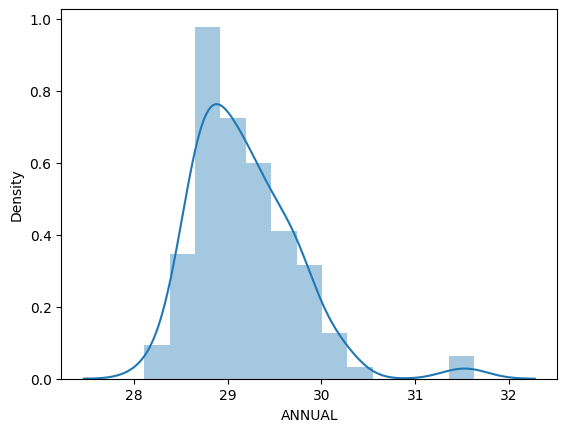

In [ ]:
sns.distplot(data['ANNUAL']);

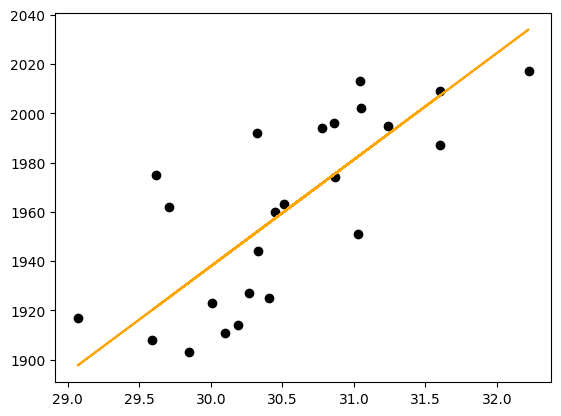

In [ ]:
plt.scatter(X_test['SEP'], Y_test, color="black")
plt.plot(X_test['SEP'],Y_pred, color="orange")
plt.show()

In [ ]:
Y_test_predict = regressor.predict(X_test)

In [ ]:
Y_train_predict = regressor.predict(X_train)

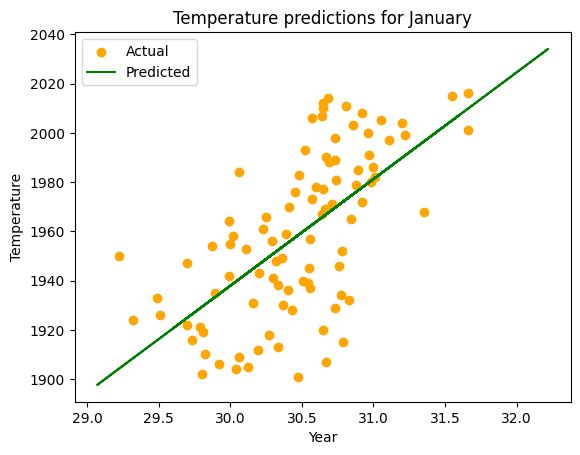

In [ ]:
plt.scatter(X_train, Y_train, color='orange', label='Actual')
plt.plot(X_test, Y_test_predict, color='green', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature predictions for January')
plt.legend()
plt.show()